In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

In [2]:
url = 'https://raw.githubusercontent.com/mward95/project_4/main/data/Copy_of_myopia.csv'
myopia_df = pd.read_csv(url)
myopia_df.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [3]:
# Remove MYOPIC target from features data
y = myopia_df.MYOPIC.values
X = myopia_df.drop(columns="MYOPIC").values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [4]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=17))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [7]:
# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train,epochs=100)

Train on 463 samples
Epoch 1/100
463/463 [==============================] - 1s 1ms/sample - loss: 0.6009 - accuracy: 0.6415
Epoch 2/100
463/463 [==============================] - 0s 52us/sample - loss: 0.5073 - accuracy: 0.8013
Epoch 3/100
463/463 [==============================] - 0s 52us/sample - loss: 0.4485 - accuracy: 0.8488
Epoch 4/100
463/463 [==============================] - 0s 52us/sample - loss: 0.4102 - accuracy: 0.8726
Epoch 5/100
463/463 [==============================] - 0s 54us/sample - loss: 0.3838 - accuracy: 0.8726
Epoch 6/100
463/463 [==============================] - 0s 69us/sample - loss: 0.3644 - accuracy: 0.8683
Epoch 7/100
463/463 [==============================] - 0s 50us/sample - loss: 0.3493 - accuracy: 0.8683
Epoch 8/100
463/463 [==============================] - 0s 54us/sample - loss: 0.3380 - accuracy: 0.8704
Epoch 9/100
463/463 [==============================] - 0s 50us/sample - loss: 0.3286 - accuracy: 0.8704
Epoch 10/100
463/463 [======================

463/463 [==============================] - 0s 52us/sample - loss: 0.1226 - accuracy: 0.9503
Epoch 79/100
463/463 [==============================] - 0s 54us/sample - loss: 0.1200 - accuracy: 0.9568
Epoch 80/100
463/463 [==============================] - 0s 50us/sample - loss: 0.1195 - accuracy: 0.9568
Epoch 81/100
463/463 [==============================] - 0s 50us/sample - loss: 0.1175 - accuracy: 0.9546
Epoch 82/100
463/463 [==============================] - 0s 50us/sample - loss: 0.1161 - accuracy: 0.9546
Epoch 83/100
463/463 [==============================] - 0s 48us/sample - loss: 0.1150 - accuracy: 0.9590
Epoch 84/100
463/463 [==============================] - 0s 52us/sample - loss: 0.1148 - accuracy: 0.9568
Epoch 85/100
463/463 [==============================] - 0s 48us/sample - loss: 0.1132 - accuracy: 0.9611
Epoch 86/100
463/463 [==============================] - 0s 56us/sample - loss: 0.1114 - accuracy: 0.9633
Epoch 87/100
463/463 [==============================] - 0s 52us/samp

In [8]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

155/155 - 0s - loss: 0.5549 - accuracy: 0.8645
Loss: 0.5549084990255294, Accuracy: 0.8645161390304565


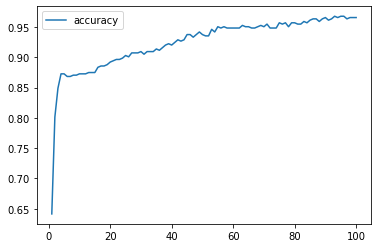

In [9]:
# Create a DataFrame containing training history
# history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
# Plot the accuracy
history_df.plot(y="accuracy")

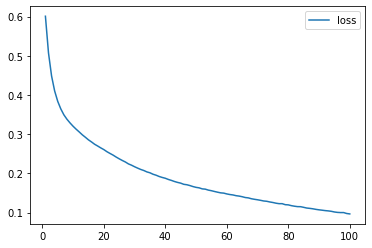

In [10]:
history_df.plot(y="loss")

In [11]:
history_df

,loss,accuracy
1,0.600873,0.641469
2,0.507289,0.801296
3,0.448484,0.848812
4,0.410207,0.872570
5,0.383760,0.872570
...,...,...
96,0.100277,0.967603
97,0.099824,0.963283
98,0.099840,0.965443
99,0.097444,0.965443


In [12]:
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=17))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [13]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=80,
    hyperband_iterations=2)

ModuleNotFoundError: No module named 'keras_tuner'